# Image Classification and Object Detection System
---

**Project Overview:**
The Image Classification and Object Detection System aims to build a deep learning-based solution for
classifying images into predefined categories and detecting objects within images. The project will leverage
powerful machine learning frameworks like TensorFlow, Keras, and PyTorch, and integrate cloud tools such
as Azure for scalability and real-time deployment.

### Milestone 1: Data Collection, Preprocessing, and Exploration

---
#### Objectives:
• Collect, preprocess, and explore datasets suitable for both image classification and object detection tasks.

#### Tasks:
1. Data Collection:
   - Gather labeled datasets for image classification (e.g., CIFAR-10, ImageNet) and annotated datasets for object detection (e.g., COCO, Pascal VOC).
   - Ensure the data includes diverse classes and various object types to support robust model training.
2. Data Preprocessing:
   - Resize, normalize, and augment images to prepare them for deep learning models.
   - Implement augmentation techniques such as rotations, flips, and color jittering to increase model robustness.
   - Split datasets into training, validation, and test sets.
3. Exploratory Data Analysis (EDA):
   - Visualize sample images, class distributions, and bounding box annotations for object detection.
   - Investigate any data imbalances or biases in the dataset, such as class imbalance or poor quality annotations.


#### Deliverables:
- **Cleaned and Preprocessed Image Dataset:** A fully processed dataset ready for model development.
- **Preprocessing Pipeline Documentation:** Detailed description of data augmentation techniques and transformations applied.
- **EDA Report:** A comprehensive exploration of the dataset, including visualizations and identified challenges.

#### Importing the data from roboflow

[Braint Tumor Dataset](https://universe.roboflow.com/test-svk7h/brain-tumors-detection)

In [1]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="d3MLo2NB1dQqNnASBgPJ")
# project = rf.workspace("computer-vision-wi0v7").project("brain-tumor-detection-7aotn")
# version = project.version(4)
# dataset = version.download("yolov8")

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="d3MLo2NB1dQqNnASBgPJ")
project = rf.workspace("computer-vision-wi0v7").project("brain-tumors-detection-uvzup")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Brain-Tumors-Detection-1 in yolov8:: 100%|██████████| 3614/3614 [00:00<00:00, 6495.75it/s]


#### Importing the necessary modules

In [3]:
import os
import random
import json
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from glob import glob
from PIL import Image
import numpy as np

#### EDA - Visualize Sample Images, Class Distributions, and Bounding Boxes

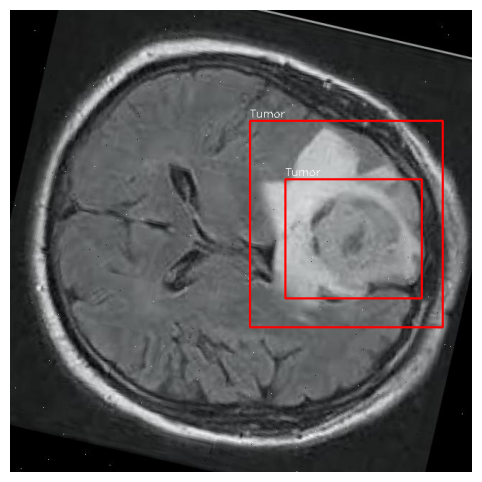

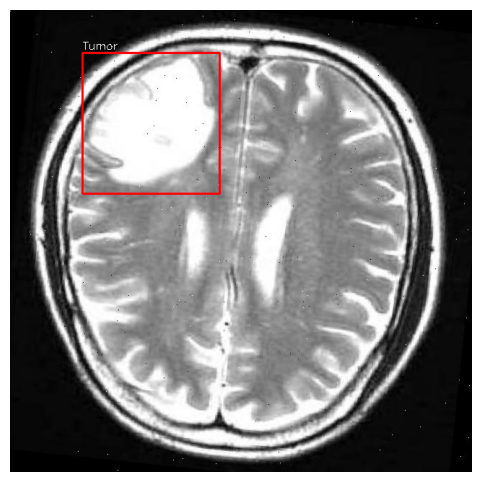

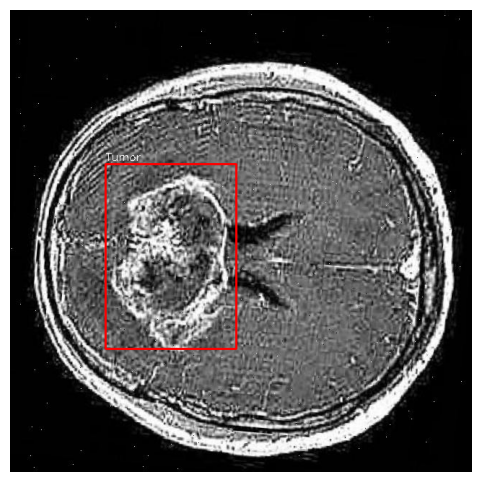

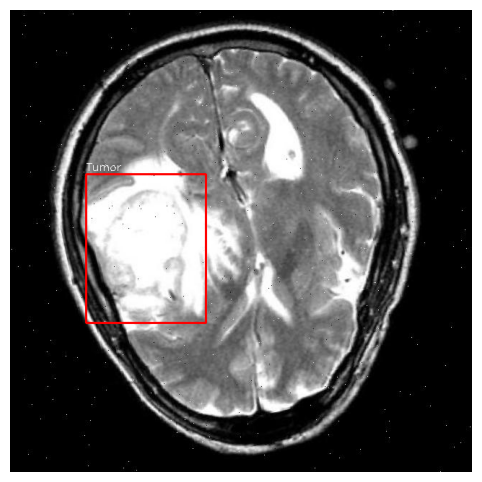

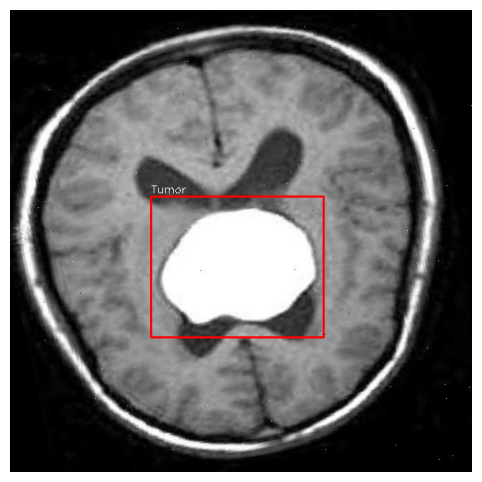

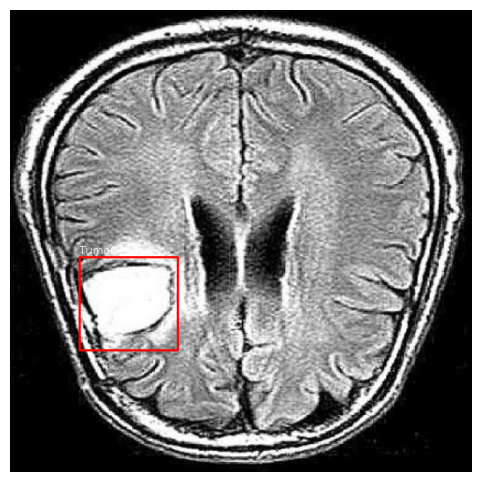

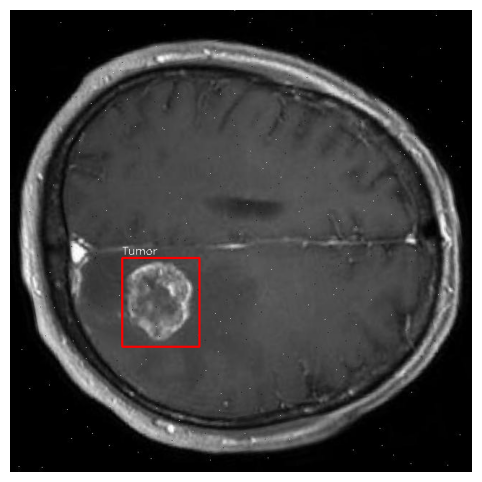

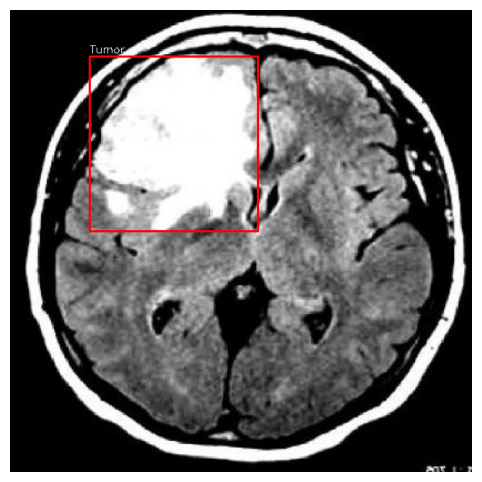

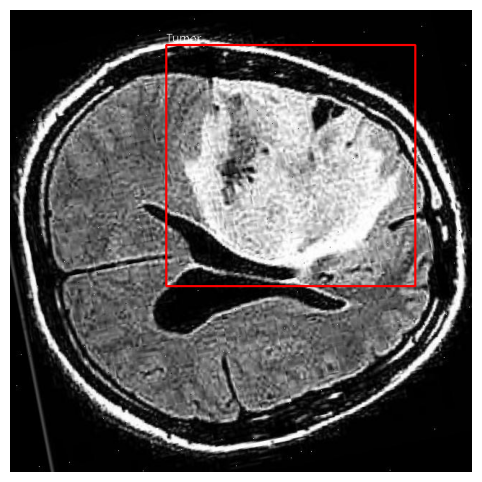

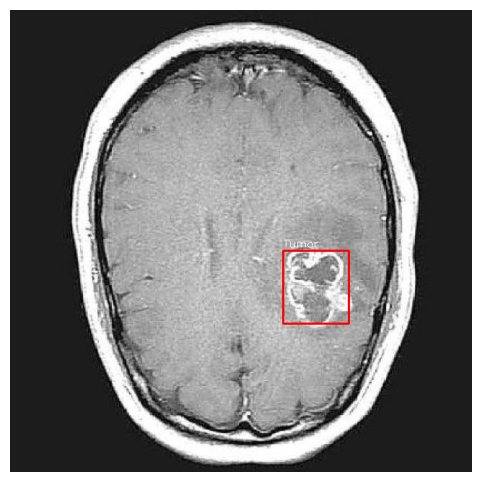

In [ ]:
# Path to Roboflow-exported dataset
# data_dir = "/content/Brain-Tumor-Detection-4"  # Update this after uploading
data_dir = "/content/Brain-Tumors-Detection-1"
train_dir = os.path.join(data_dir, "train")
valid_dir = os.path.join(data_dir, "valid")
test_dir = os.path.join(data_dir, "test")

# Load example images and annotations
def load_sample_images_with_boxes(split_dir, num_samples=10):
    image_paths = glob(os.path.join(split_dir, "images", "*.jpg"))
    label_paths = glob(os.path.join(split_dir, "labels", "*.txt"))

    # class_mapping = {
    #   0: "Astrocytoma",
    #   1: "Carcinoma",
    #   2: "Ependymoma",
    #   3: "Ganglioglioma",
    #   4: "Germinoma",
    #   5: "Glioblastoma",
    #   6: "Granuloma",
    #   7: "Medulloblastoma",
    #   8: "Meningioma",
    #   9: "Neurocytoma",
    #   10: "Oligodendroglioma",
    #   11: "Papilloma",
    #   12: "Schwannoma",
    #   13: "Tuberculoma",
    #   14: "Normal"
    # }

    image_samples = random.sample(image_paths, min(num_samples, len(image_paths)))
    # for image_path in image_paths[:num_samples]:
    for image_path in image_samples:
        label_path = image_path.replace("images", "labels").replace(".jpg", ".txt")
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # Plot bounding boxes
        with open(label_path, "r") as f:
            lines = f.readlines()
            for line in lines:
                cls, x_center, y_center, width, height = map(float, line.strip().split())
                x1 = int((x_center - width / 2) * w)
                y1 = int((y_center - height / 2) * h)
                x2 = int((x_center + width / 2) * w)
                y2 = int((y_center + height / 2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                # cv2.putText(img, class_mapping[cls], (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
                cv2.putText(img, "Tumor", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis("off")
        # plt.title(f"Sample with annotations: {os.path.basename(image_path)}")
        plt.show()

# Visualize samples from train set
load_sample_images_with_boxes(train_dir)

#### Convert the data to a dataframe

In [ ]:
# class_mapping = {
#     0: "Astrocytoma",
#     1: "Carcinoma",
#     2: "Ependymoma",
#     3: "Ganglioglioma",
#     4: "Germinoma",
#     5: "Glioblastoma",
#     6: "Granuloma",
#     7: "Medulloblastoma",
#     8: "Meningioma",
#     9: "Neurocytoma",
#     10: "Oligodendroglioma",
#     11: "Papilloma",
#     12: "Schwannoma",
#     13: "Tuberculoma",
#     14: "Normal"
# }

data_dir = "/content/Brain-Tumors-Detection-1"

data = []
for split in ['train', 'valid', 'test']:
    image_dir = os.path.join(data_dir, split, "images")
    label_dir = os.path.join(data_dir, split, "labels")

    for label_path in glob(os.path.join(label_dir, '*.txt')):
        image_file = os.path.basename(label_path).replace('.txt', '.jpg')
        with open(label_path, 'r') as f:
            for line in f:
                cls, x_center, y_center, width, height = map(float, line.strip().split())
                data.append({
                    'split': split,
                    'image': image_file,
                    'class_id': int(cls),
                    # 'class_name': class_mapping[cls],
                    'class_name': "Tumor",
                    'x_center': x_center,
                    'y_center': y_center,
                    'width': width,
                    'height': height
                })

df = pd.DataFrame(data)

In [6]:
# Preview the DataFrame
df.head()

split                                             image  class_id  \
0  train  y141_jpg.rf.3f2eea743ccaa175ae26d8472c8a2801.jpg         0   
1  train  y305_jpg.rf.b0c5beb226045d3745941d40732ada89.jpg         0   
2  train  y320_jpg.rf.4996933d10f8ab5f2565cd2e5fa8d2e6.jpg         0   
3  train   y20_jpg.rf.4e26c8452d74f86ab57dacab6eb1d81a.jpg         0   
4  train  y252_jpg.rf.0102c3a5e37afa3273381dc764a96837.jpg         0   

  class_name  x_center  y_center     width    height  
0      Tumor  0.574219  0.299219  0.245312  0.235937  
1      Tumor  0.360938  0.404687  0.207813  0.212500  
2      Tumor  0.262500  0.753125  0.245312  0.300000  
3      Tumor  0.610156  0.745313  0.128125  0.198437  
4      Tumor  0.539062  0.678906  0.287500  0.312500

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   split       2064 non-null   object 
 1   image       2064 non-null   object 
 2   class_id    2064 non-null   int64  
 3   class_name  2064 non-null   object 
 4   x_center    2064 non-null   float64
 5   y_center    2064 non-null   float64
 6   width       2064 non-null   float64
 7   height      2064 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 129.1+ KB


#### 1. Class Distribution: How many objects per class

In [9]:
class_counts = df['class_name'].value_counts().sort_index()
class_counts

class_name
Tumor    2064
Name: count, dtype: int64



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



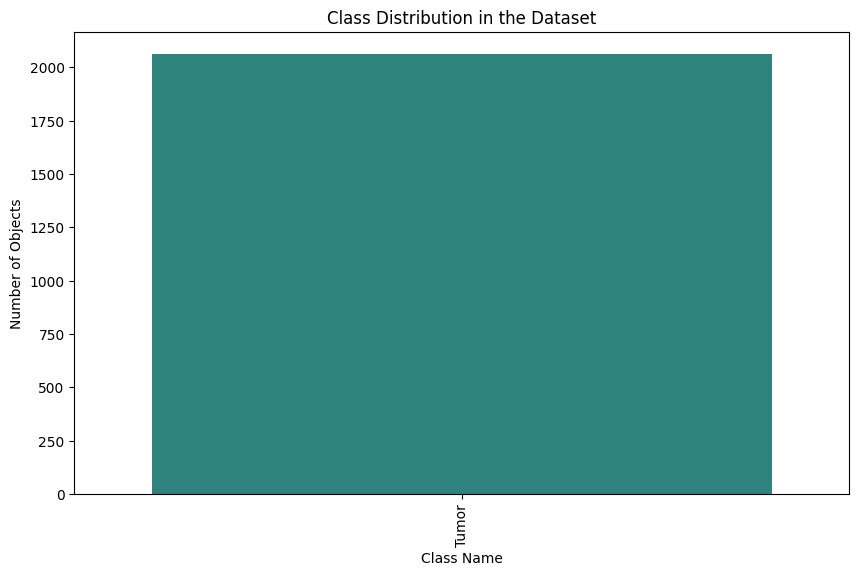

In [10]:
# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Class Name")
plt.ylabel("Number of Objects")
plt.title("Class Distribution in the Dataset")
plt.xticks(rotation=90)
plt.show()

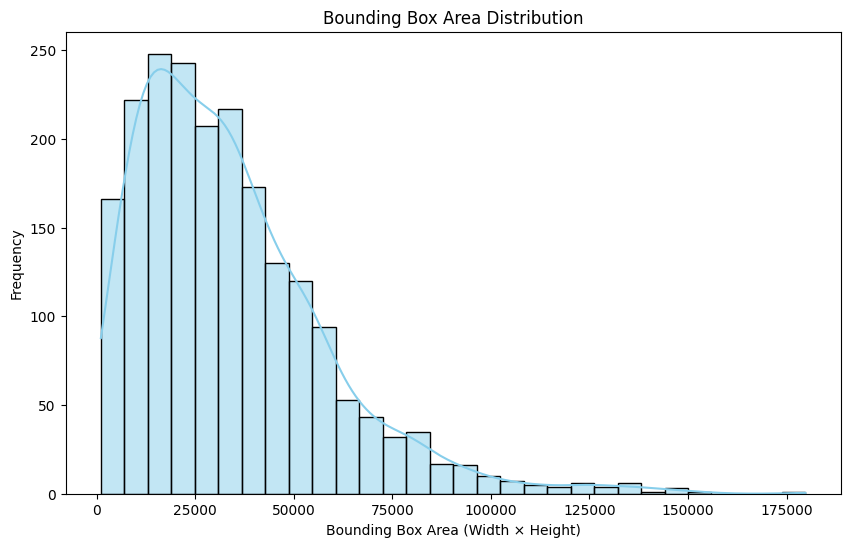

In [11]:
# 2. Bounding Box Sizes (Width x Height)
df['bbox_area'] = (df['width']* 640) * (df['height'] * 640)

# Plot bounding box size distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['bbox_area'], kde=True, color='skyblue', bins=30)
plt.xlabel("Bounding Box Area (Width × Height)")
plt.ylabel("Frequency")
plt.title("Bounding Box Area Distribution")
plt.show()

In [12]:
# 3. Number of Objects per Image (Object Density)
objects_per_image = df.groupby('image').size()
objects_per_image

image
y0_jpg.rf.50d44b97286d0480eeaeb80d9f0002e7.jpg      1
y0_jpg.rf.92ccc1c99d0e318ee26bf7ecb896c08c.jpg      1
y0_jpg.rf.f3ceb019d24e20e8b0f4816ac3767518.jpg      1
y100_jpg.rf.bff57796d0dfc7ee0b4fd5d5f69e9b67.jpg    1
y100_jpg.rf.c2a6cab56e8ec7544170bb3e3ec2469f.jpg    1
                                                   ..
y99_jpg.rf.28f7a959b10af2ca22f85c75478f3c4c.jpg     1
y99_jpg.rf.f482244561841905106e7493dbeb21e2.jpg     1
y9_jpg.rf.652de11daa4f7710d69bde91a01592d7.jpg      1
y9_jpg.rf.af202509eaeaffa8b082d30962cedf1e.jpg      1
y9_jpg.rf.f8eb493ae534d7f24a4bf47e9bd0654a.jpg      1
Length: 1801, dtype: int64

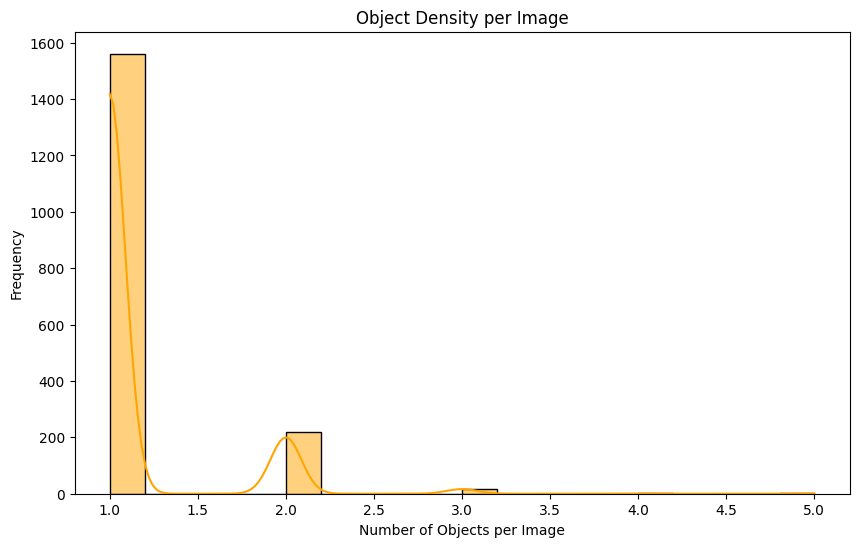

In [13]:
# Plot number of objects per image
plt.figure(figsize=(10, 6))
sns.histplot(objects_per_image, kde=True, color='orange', bins=20)
plt.xlabel("Number of Objects per Image")
plt.ylabel("Frequency")
plt.title("Object Density per Image")
plt.show()

In [14]:
# 4. Check for Missing Annotations (Optional)
missing_annotations = df.isnull().sum()
print("Missing Annotations: ", missing_annotations)

Missing Annotations:  split         0
image         0
class_id      0
class_name    0
x_center      0
y_center      0
width         0
height        0
bbox_area     0
dtype: int64


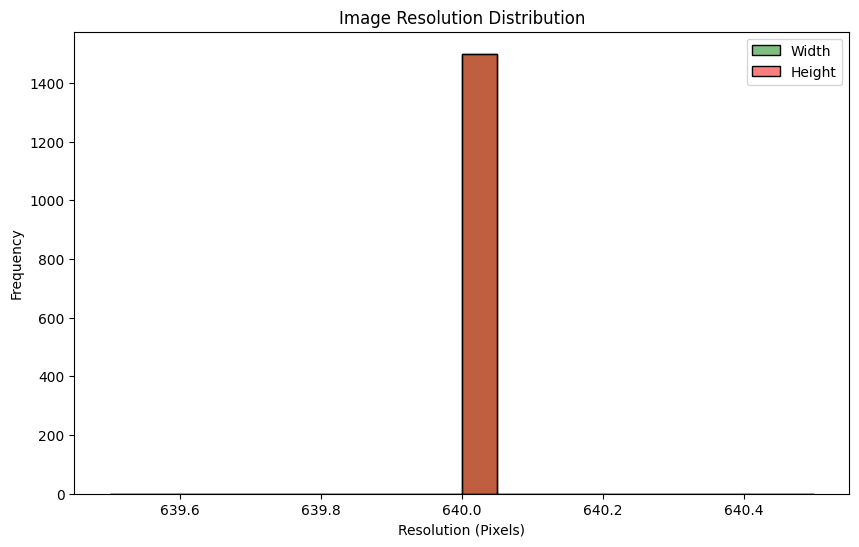

In [15]:
# 5. Investigating Image Resolutions
# Assuming images are properly resized, you can check any unusual image dimensions
image_resolutions = []
for image_file in glob(os.path.join(train_dir, "images", "*.jpg")):
    img = plt.imread(image_file)
    image_resolutions.append(img.shape[:2])  # height, width

# Convert to DataFrame for easier analysis
res_df = pd.DataFrame(image_resolutions, columns=["Height", "Width"])

# Visualize Image Resolutions
plt.figure(figsize=(10, 6))
sns.histplot(res_df['Width'], kde=True, color='green', bins=20, label='Width')
sns.histplot(res_df['Height'], kde=True, color='red', bins=20, label='Height')
plt.xlabel("Resolution (Pixels)")
plt.ylabel("Frequency")
plt.title("Image Resolution Distribution")
plt.legend()
plt.show()

In [16]:
# Summary Statistics
print("Summary Statistics for Bounding Boxes:")
print(df[['width', 'height', 'bbox_area']].describe())
print()

# Investigate class imbalance (optional)
# Assuming your classes are already labeled from 0 to 14 (15)
# You can also visualize any imbalance directly by showing only the most frequent classes:
top_classes = class_counts.head()
print(f"Top 5 most frequent classes:\n{top_classes}")

Summary Statistics for Bounding Boxes:
             width       height      bbox_area
count  2064.000000  2064.000000    2064.000000
mean      0.270772     0.270874   33910.821463
std       0.102050     0.105058   24300.455821
min       0.057813     0.045312    1073.000000
25%       0.196875     0.196875   15435.500000
50%       0.264062     0.264062   29534.000000
75%       0.332031     0.337500   45879.750000
max       0.662500     0.662500  179776.000000

Top 5 most frequent classes:
class_name
Tumor    2064
Name: count, dtype: int64


### Milestone 2: Image Classification and Object Detection Model Development

#### Objectives
- Develop deep learning models for both image classification and object detection.

#### Tasks
1. **Image Classification Model**
- Implement a Convolutional Neural Network (CNN) or use pre-trained models (e.g., ResNet, EfficientNet) for classifying images into predefined categories.

2. **Object Detection Model**
- Implement an object detection model such as YOLO, Faster R-CNN, or SSD for detecting and classifying objects within images.

3. **Model Evaluation**
- Evaluate the image classification model using metrics like:
  - Accuracy
  - Precision
  - Recall
  - F1-score
- Evaluate the object detection model using metrics like:
  - mAP (mean Average Precision)
  - IoU (Intersection over Union)
  - Detection accuracy

4. **Model Optimization**
- Apply techniques like:
  - Hyperparameter tuning
  - Transfer learning

#### Deliverables
- **Trained Image Classification Model**: A deep learning model for classifying images into categories.
- **Trained Object Detection Model**: A model capable of detecting and classifying objects within images.
- **Model Evaluation Report**: A report detailing the performance of both models using relevant metrics.

### Install YoloV8

In [17]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

### Import libraries

In [18]:
from ultralytics import YOLO
from IPython.display import Image, display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [19]:
DATA_YAML_PATH = "/content/Brain-Tumors-Detection-1/data.yaml"

### Check the content of the yaml file

In [20]:
with open(DATA_YAML_PATH, 'r') as f:
    print(f.read())  # ✅ Should show class names, train/val paths, etc.

names:
- tumor
nc: 1
roboflow:
  license: CC BY 4.0
  project: brain-tumors-detection-uvzup
  url: https://universe.roboflow.com/computer-vision-wi0v7/brain-tumors-detection-uvzup/dataset/1
  version: 1
  workspace: computer-vision-wi0v7
test: ../test/images
train: ../train/images
val: ../valid/images



### Load and train the model

In [21]:
# Load a pre-trained YOLOv8 model (transfer learning)
model = YOLO("yolov8m.pt")  # use yolov8n.pt (nano), yolov8s.pt (small), yolov8m.pt (medium), etc.

# Train
model.train(data=DATA_YAML_PATH,
            epochs=50,
            imgsz=640,
            batch=16,
            name="brain_tumor_yolov8")

100%|██████████| 49.7M/49.7M [00:00<00:00, 291MB/s]


Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Brain-Tumors-Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=brain_tumor_yolov8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 165MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3776275  ultralytics.nn.modules.head.Detect           [1, [192, 384, 576]]          
Model summary: 169 layers, 25,856,899 parameters, 25,856,883 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 197MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 86.6±151.6 MB/s, size: 47.6 KB)


train: Scanning /content/Brain-Tumors-Detection-1/train/labels... 1500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:02<00:00, 696.42it/s]

train: New cache created: /content/Brain-Tumors-Detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 18.2±8.5 MB/s, size: 62.0 KB)


val: Scanning /content/Brain-Tumors-Detection-1/valid/labels... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<00:00, 458.25it/s]

val: New cache created: /content/Brain-Tumors-Detection-1/valid/labels.cache


Plotting labels to runs/detect/brain_tumor_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/brain_tumor_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.15G        1.5      1.877      1.737         24        640: 100%|██████████| 94/94 [00:51<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


                   all        201        241     0.0228      0.083    0.00969      0.004

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.35G      1.593      1.506      1.822         19        640: 100%|██████████| 94/94 [00:54<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        201        241    0.00582     0.0124    0.00114   0.000331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       6.4G      1.621      1.487      1.856         21        640: 100%|██████████| 94/94 [00:48<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]


                   all        201        241      0.114       0.49     0.0741     0.0341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.31G      1.569      1.412      1.805         17        640: 100%|██████████| 94/94 [00:49<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]


                   all        201        241      0.785      0.627      0.706      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.36G      1.514      1.307      1.748         25        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        201        241      0.841      0.639      0.766      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       6.3G      1.486       1.28      1.731         23        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.743      0.648      0.709      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.36G       1.46      1.241      1.716         15        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        201        241      0.826      0.714      0.771      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.31G        1.4      1.171      1.673         31        640: 100%|██████████| 94/94 [00:49<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]

                   all        201        241      0.825      0.755        0.8       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.35G      1.396      1.145       1.65         18        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        201        241      0.864      0.736      0.842      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       6.3G      1.385      1.065      1.639         20        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        201        241      0.827      0.809      0.863      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.36G      1.367       1.04      1.634         17        640: 100%|██████████| 94/94 [00:48<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.915      0.762       0.85      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.27G      1.324     0.9992      1.606         28        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.864      0.822      0.875      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.35G      1.346      1.011      1.597         22        640: 100%|██████████| 94/94 [00:48<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        201        241      0.914      0.801      0.888      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.31G      1.331      1.007      1.601         30        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.883      0.817      0.891      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.33G      1.311     0.9864      1.563         20        640: 100%|██████████| 94/94 [00:48<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        201        241       0.85      0.728      0.842      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.26G      1.304     0.9598      1.569         25        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        201        241       0.88      0.822      0.902      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.37G      1.305     0.9204      1.568         22        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.919      0.706      0.827      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       6.3G      1.293     0.9205      1.555         21        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        201        241       0.91      0.801      0.914      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.36G        1.3     0.9363      1.577         12        640: 100%|██████████| 94/94 [00:48<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        201        241      0.863      0.801      0.887      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.31G      1.275     0.9005      1.537         24        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        201        241      0.929      0.814      0.919      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.35G      1.283     0.8821      1.551         30        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        201        241      0.922      0.789       0.89      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.26G      1.267     0.8663      1.536         28        640: 100%|██████████| 94/94 [00:48<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        201        241      0.917      0.776      0.908      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.35G      1.266      0.881      1.532         21        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        201        241      0.881      0.813      0.896      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.27G       1.23     0.8403      1.517         22        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.942      0.804      0.911      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.35G      1.215     0.8335      1.501         25        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.941      0.813      0.919      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.27G      1.213     0.8247      1.472         16        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        201        241      0.872      0.873      0.917      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.36G      1.215      0.807      1.486         28        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        201        241      0.713       0.71      0.736      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.32G      1.202     0.8033      1.493         22        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        201        241      0.925       0.82      0.924      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.36G      1.169     0.7871      1.457         21        640: 100%|██████████| 94/94 [00:48<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        201        241      0.854       0.78      0.875      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.31G      1.148     0.7627      1.446         17        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.901      0.826      0.929      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.36G      1.135     0.7469      1.423         25        640: 100%|██████████| 94/94 [00:48<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.817      0.576      0.669      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.31G      1.139     0.7484      1.449         28        640: 100%|██████████| 94/94 [00:48<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]

                   all        201        241      0.927      0.784      0.918      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.37G      1.142     0.7431      1.433         21        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        201        241      0.906      0.757      0.877      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.27G      1.111     0.7092      1.392         25        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        201        241      0.918      0.822      0.928      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.36G      1.098     0.7164      1.397         19        640: 100%|██████████| 94/94 [00:48<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        201        241      0.874      0.718      0.828      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.31G      1.078     0.6886      1.389         25        640: 100%|██████████| 94/94 [00:48<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        201        241      0.927      0.839      0.937      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.35G      1.079     0.7065      1.389         16        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.944      0.776      0.913      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.26G      1.062     0.6803      1.363         25        640: 100%|██████████| 94/94 [00:48<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        201        241      0.946      0.788      0.905      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.35G      1.034     0.6579      1.362         23        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        201        241      0.948      0.828      0.935       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.31G      1.029     0.6609      1.347         30        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.894      0.803      0.905      0.633


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.36G     0.9529     0.5421      1.313         15        640: 100%|██████████| 94/94 [00:49<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]

                   all        201        241      0.931      0.813      0.929       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.27G     0.9138     0.5065      1.285         14        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        201        241      0.906      0.879      0.955      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.36G      0.888     0.4898      1.261         13        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        201        241      0.933      0.813      0.934      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       6.3G     0.8751     0.4864      1.257         13        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        201        241      0.911      0.867      0.954      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.36G     0.8641     0.4727      1.249         14        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        201        241       0.94      0.847      0.956      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.31G     0.8704      0.482      1.255         13        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        201        241      0.894        0.9       0.96      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.35G     0.8664     0.4673      1.247         13        640: 100%|██████████| 94/94 [00:47<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        201        241      0.922      0.846      0.947      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.29G     0.8334     0.4519      1.226         16        640: 100%|██████████| 94/94 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        201        241      0.873      0.917      0.955      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.35G     0.8273     0.4546      1.224         15        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        201        241      0.908      0.897      0.962      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       6.3G      0.813     0.4427      1.201         13        640: 100%|██████████| 94/94 [00:47<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        201        241      0.913      0.896      0.963      0.712



50 epochs completed in 0.731 hours.
Optimizer stripped from runs/detect/brain_tumor_yolov8/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/brain_tumor_yolov8/weights/best.pt, 52.0MB

Validating runs/detect/brain_tumor_yolov8/weights/best.pt...
Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        201        241      0.912      0.896      0.963      0.712
Speed: 0.3ms preprocess, 10.3ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/brain_tumor_yolov8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cbff40e3d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

### Resume the training if it is interrupted or continue training with new data

In [22]:
# model = YOLO("path/to/last.pt")

# results = model.train(resume=True)

### Visualize training performance

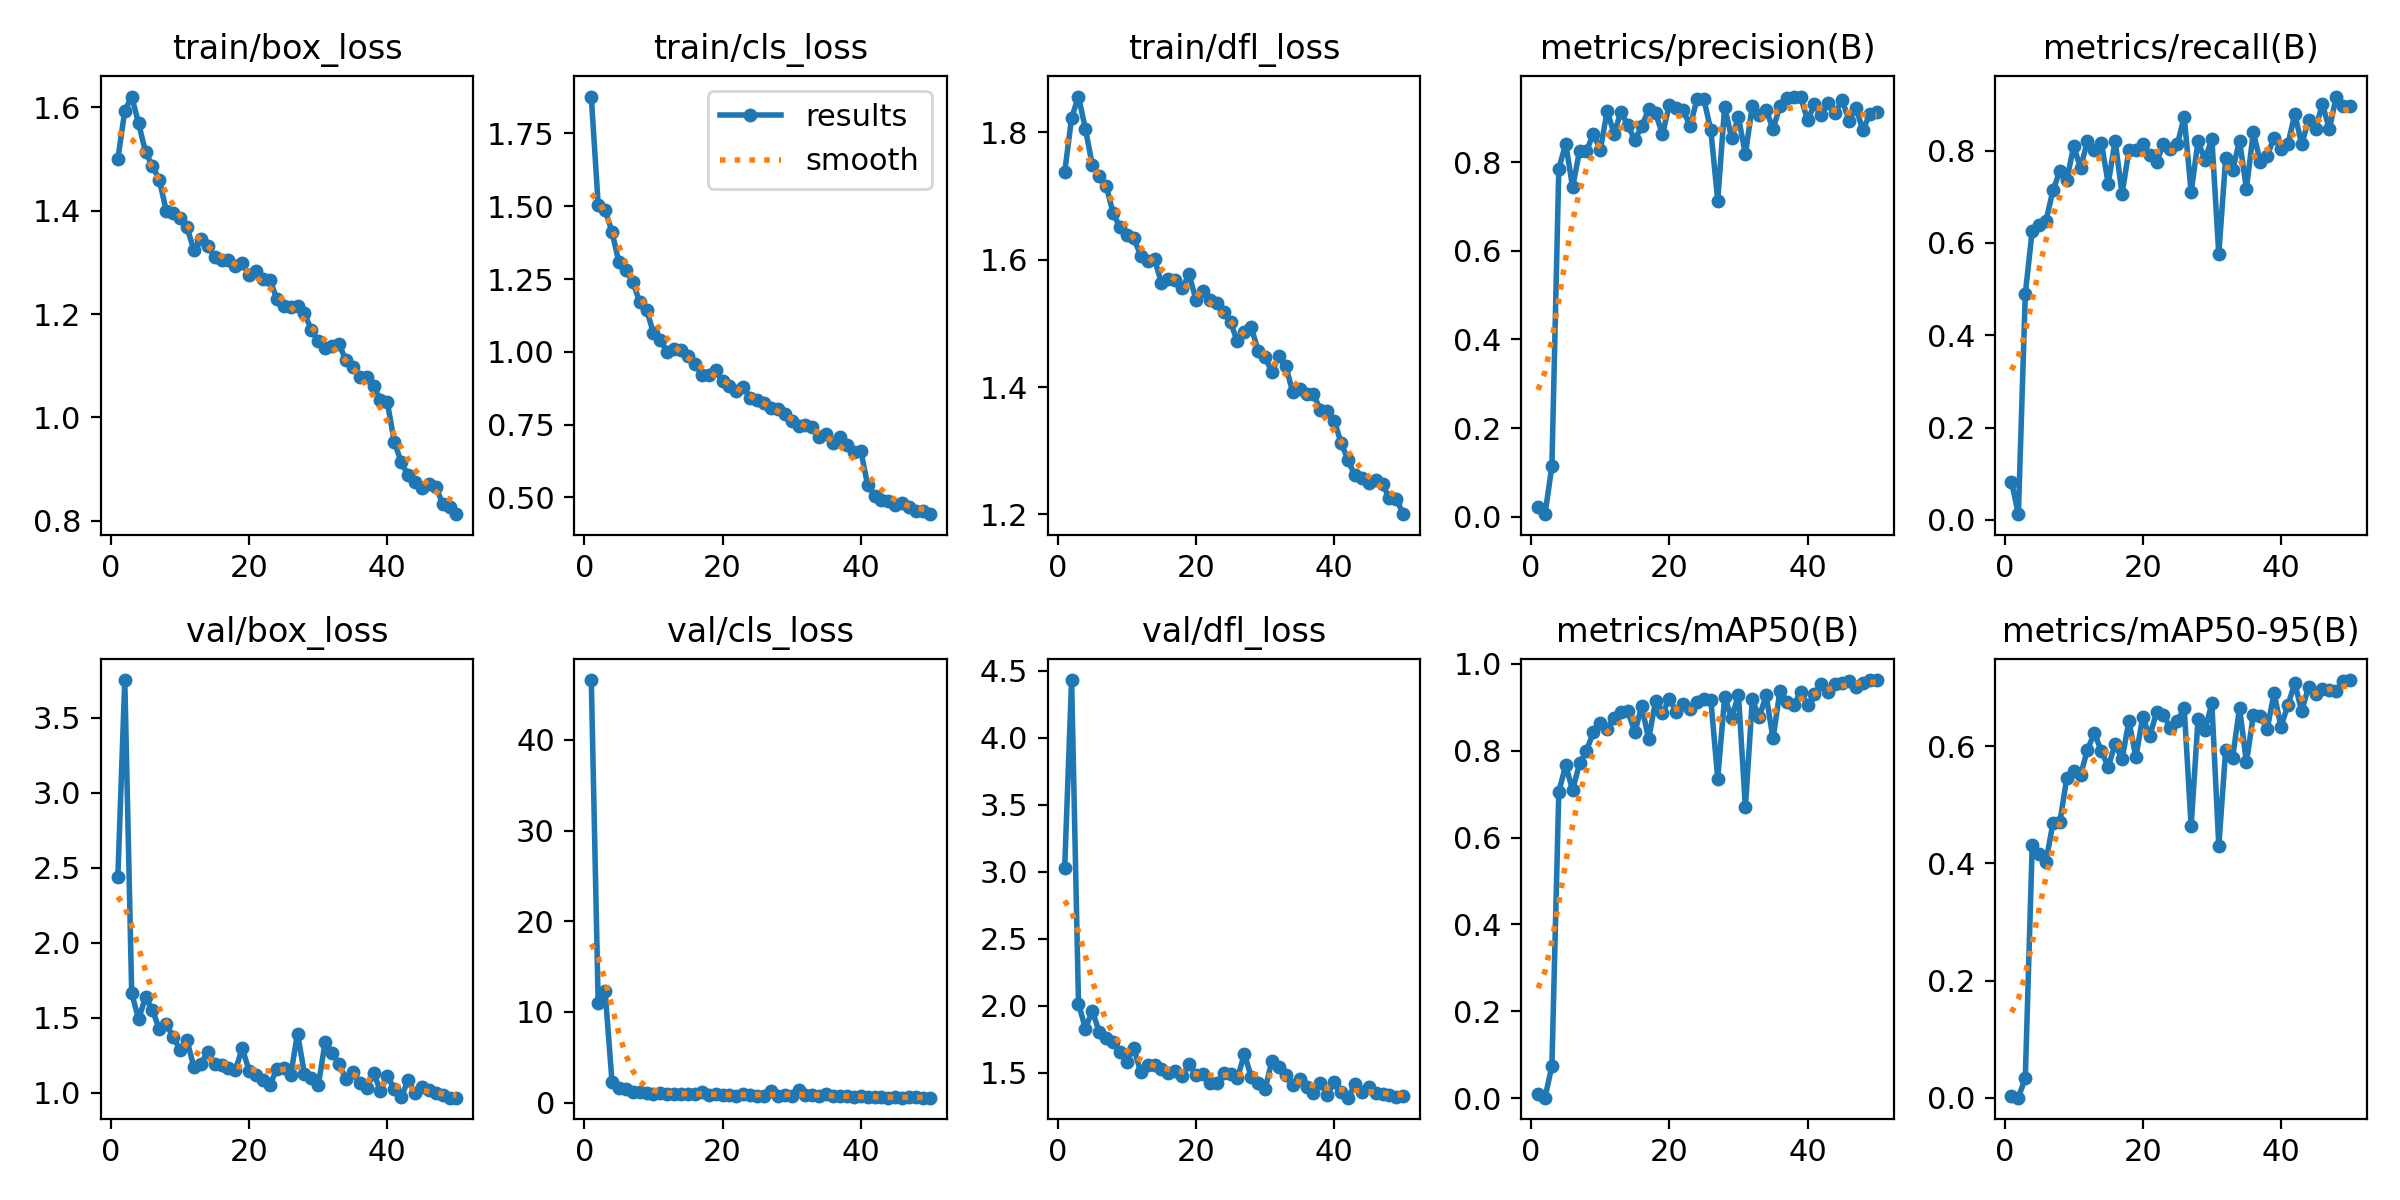

In [23]:
# Shows plots for mAP, Precision, Recall, and Loss curves
Image(filename="runs/detect/brain_tumor_yolov8/results.png")

### Evaluate model on validation set

In [38]:
metrics = model.val(data=DATA_YAML_PATH, save_json=True)

Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1322.8±651.2 MB/s, size: 63.3 KB)


val: Scanning /content/Brain-Tumors-Detection-1/valid/labels.cache... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]


                   all        201        241      0.912      0.896      0.963      0.714
Speed: 2.2ms preprocess, 23.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Saving runs/detect/brain_tumor_yolov88/predictions.json...
Results saved to runs/detect/brain_tumor_yolov88


In [39]:
print("\nEvaluation Metrics:")
print(f"Precision: {metrics.results_dict['metrics/precision(B)']*100:.2f} %") # 91.23% of the predicted tumor boxes were correct (low false positives)
print(f"Recall: {metrics.results_dict['metrics/recall(B)']*100:.2f} %") # 89.62% of all actual tumors were detected (low false negatives)
print(f"mAP@0.5: {metrics.results_dict['metrics/mAP50(B)']*100:.2f} %") # 96.26% average precision when IoU threshold is 0.5 (common detection benchmark)
print(f"mAP@0.5:0.95: {metrics.results_dict['metrics/mAP50-95(B)']*100:.2f} %") # 71.24% precision averaged over IoU thresholds (stricter metric, harder to optimize)
print(f"Fitness: {metrics.results_dict['fitness']*100:.2f} %") # Combined score (used internally by YOLO for tuning, not a standalone benchmark)


Evaluation Metrics:
Precision: 91.24 %
Recall: 89.63 %
mAP@0.5: 96.27 %
mAP@0.5:0.95: 71.39 %
Fitness: 73.88 %


In [40]:
results = model.predict(source="/content/Brain-Tumors-Detection-1/test/images", save=True)


image 1/100 /content/Brain-Tumors-Detection-1/test/images/y701_jpg.rf.ff91914f7d724b3654ae2f72d0468c00.jpg: 640x640 1 tumor, 39.0ms
image 2/100 /content/Brain-Tumors-Detection-1/test/images/y702_jpg.rf.57d6c9365ac9b48b0a4b82259510c8d3.jpg: 640x640 1 tumor, 36.9ms
image 3/100 /content/Brain-Tumors-Detection-1/test/images/y703_jpg.rf.0fe1d98dc2809f430f9d8028a27835d5.jpg: 640x640 1 tumor, 36.0ms
image 4/100 /content/Brain-Tumors-Detection-1/test/images/y704_jpg.rf.99fca548ed68f74530235f8bf9d8c9dd.jpg: 640x640 2 tumors, 30.4ms
image 5/100 /content/Brain-Tumors-Detection-1/test/images/y705_jpg.rf.a63300a1bf993c33496e6812eebd8a4b.jpg: 640x640 1 tumor, 30.4ms
image 6/100 /content/Brain-Tumors-Detection-1/test/images/y706_jpg.rf.71834396acf62ab21ed323598c5fea97.jpg: 640x640 1 tumor, 30.4ms
image 7/100 /content/Brain-Tumors-Detection-1/test/images/y707_jpg.rf.750fa544f73b39702da70cad06f7e907.jpg: 640x640 1 tumor, 30.4ms
image 8/100 /content/Brain-Tumors-Detection-1/test/images/y708_jpg.rf.5cc1

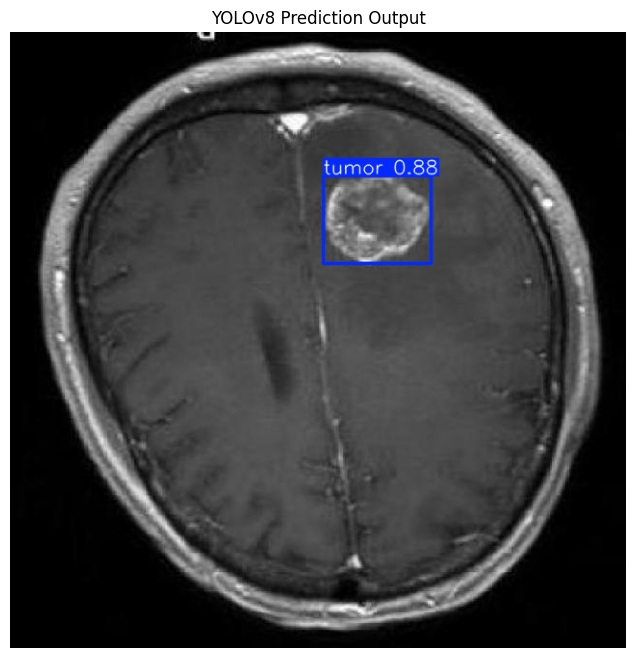

In [41]:
# Visualize one predicted image
pred_folder = "runs/detect/brain_tumor_yolov89"
file_list = os.listdir(pred_folder)
file_path = os.path.join(pred_folder, file_list[0])

img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 Prediction Output")
plt.show()


🧠 Visualizing YOLOv8 Predictions on Test Images:



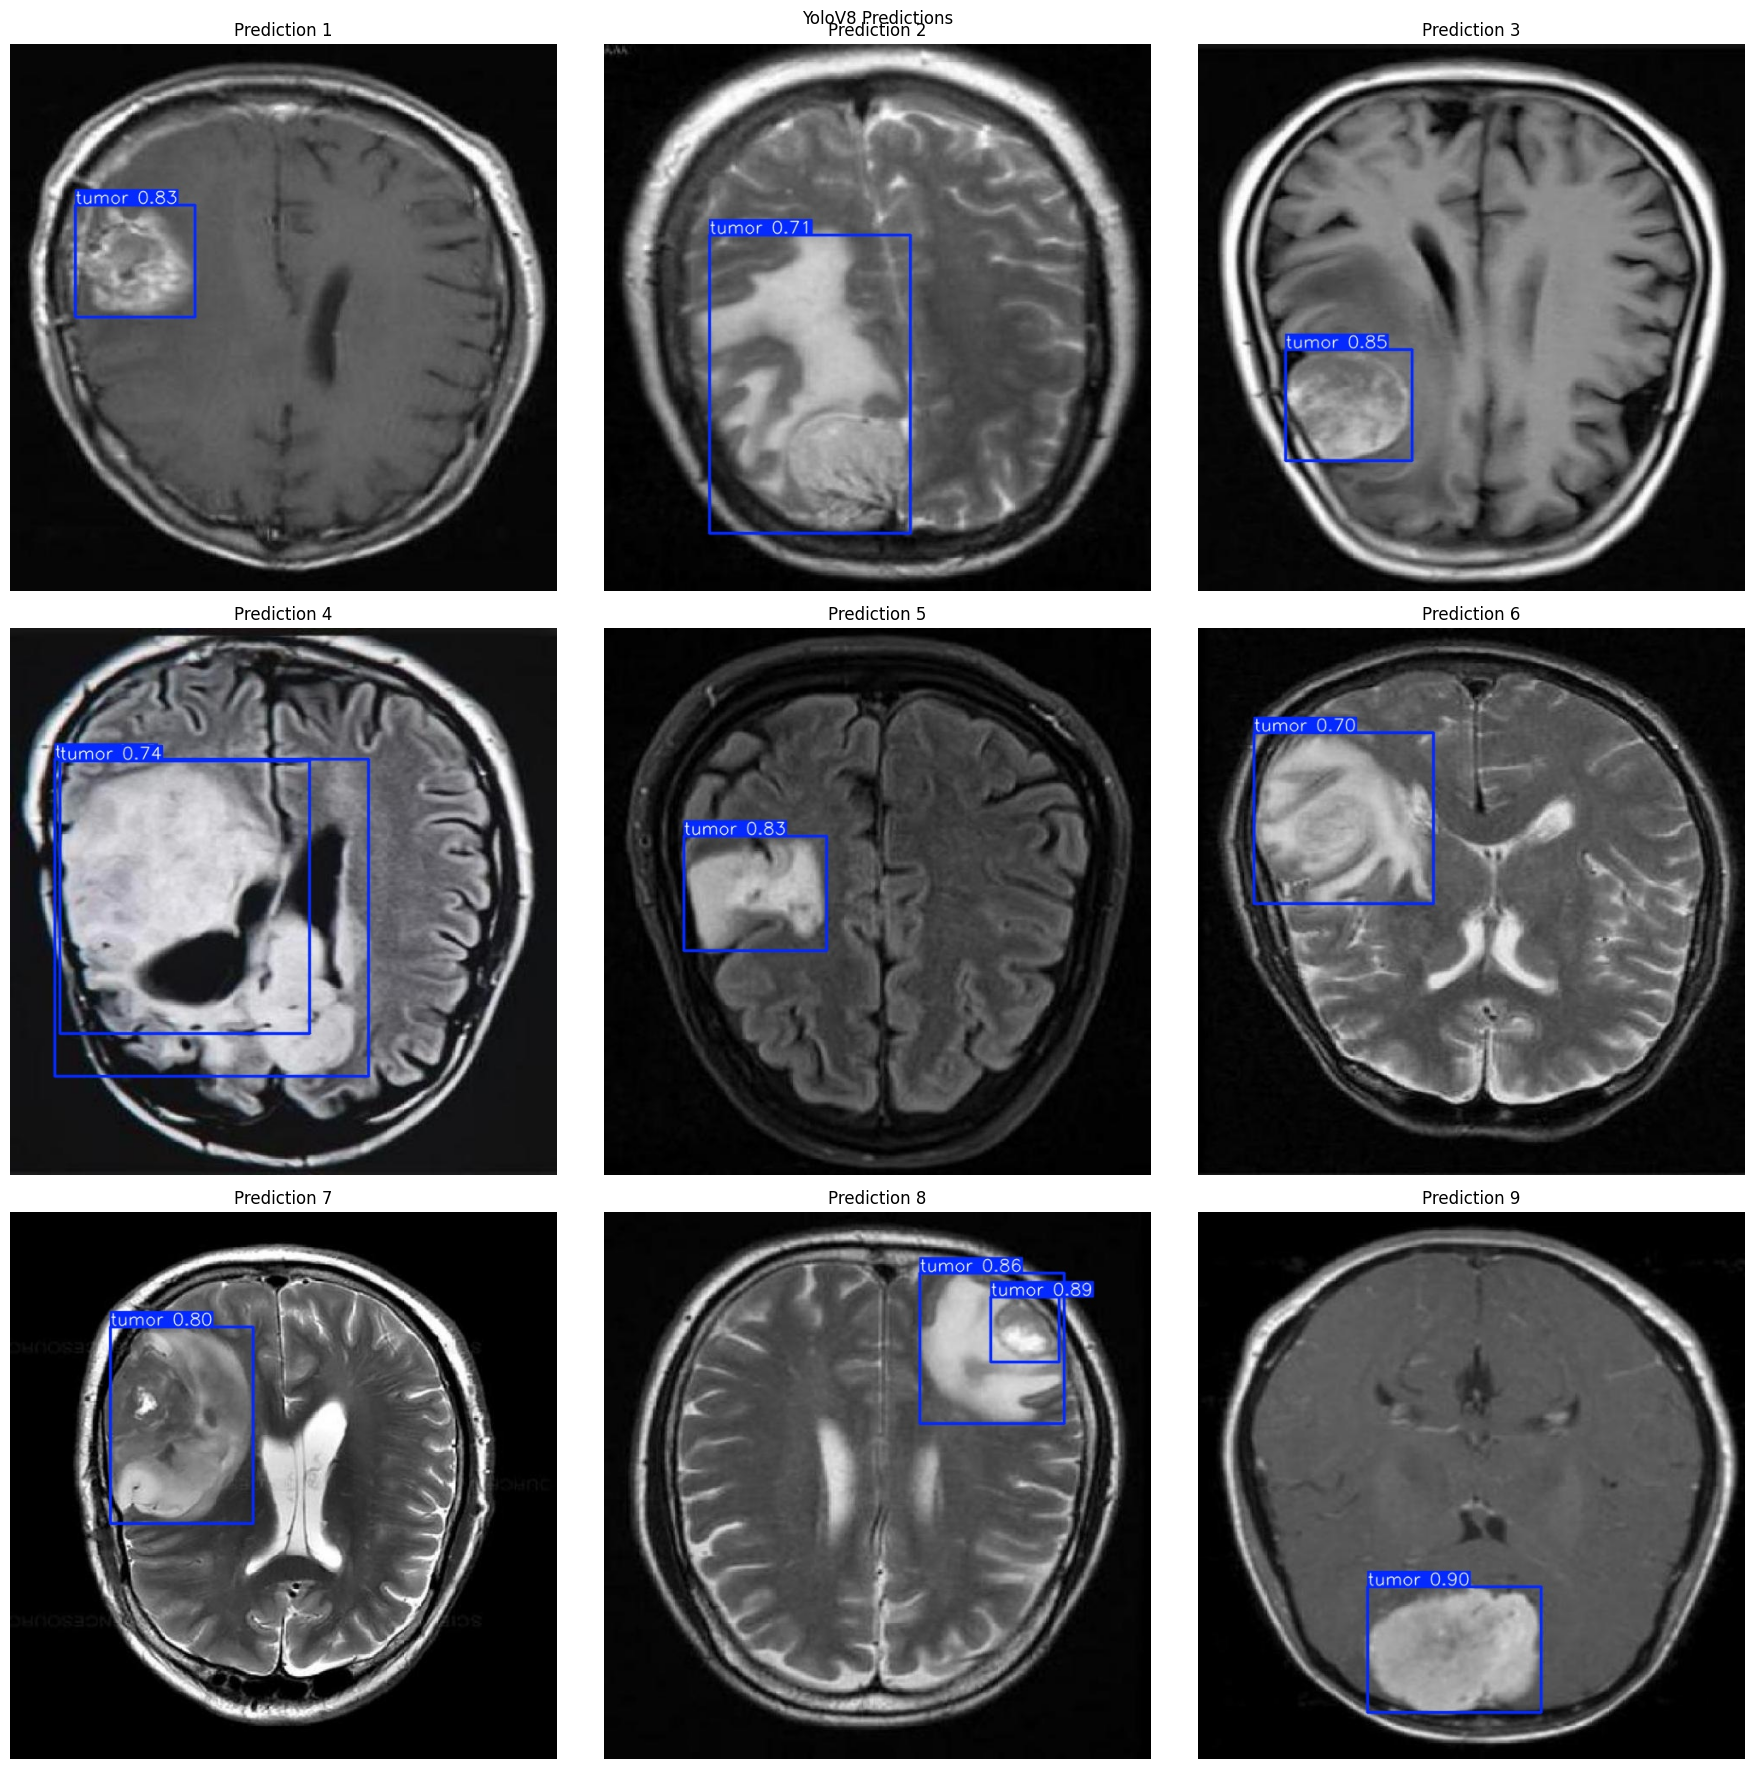

In [45]:
# STEP 8.1: Visualize all predictions with bounding boxes
print("\n🧠 Visualizing YOLOv8 Predictions on Test Images:\n")
plt.figure(figsize=(18, 18))

for i, filename in enumerate(os.listdir(pred_folder)[:9]):  # Show up to 6 images
    img_path = os.path.join(pred_folder, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction {i + 1}")

plt.suptitle("YoloV8 Predictions")
plt.tight_layout()
plt.show()

In [ ]:
# model.tune(data=DATA_YAML_PATH, epochs=10, iterations=50, imgsz=640)

In [42]:
model.export(format="onnx")  # or "torchscript", "coreml", etc.

Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/brain_tumor_yolov8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (49.6 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.46', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 151.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 220.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 332.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 17.3s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim>=0.1.46', 'onnxruntime-gpu']
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export wit

'runs/detect/brain_tumor_yolov8/weights/best.onnx'